In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import trimesh
import scipy
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import io
from PIL import Image, ImageOps
import plotly.graph_objects as go

In [6]:
def load_mesh(f_name):
    '''
    f_name: (string) name of the mesh file to load
    '''
    mesh = trimesh.load(f_name)
    return mesh

In [162]:
def plot_meshes(label_mesh, shell, range_min, range_max):
    x = shell[:,0]
    y = shell[:,1]
    z = shell[:,2]

    x1 = label_mesh[:,0]
    y1= label_mesh[:,1]
    z1 = label_mesh[:,2]

    fig = go.Figure(data=[go.Mesh3d(x=x1, y=y1, z=z1, color='lightpink', opacity=0.5)], layout_yaxis_range=[-100,100])
    fig.update_layout(
        scene = dict(
            xaxis = dict(nticks=4, range=[range_min,range_max],),
                        yaxis = dict(nticks=4, range=[range_min,range_max],),
                        zaxis = dict(nticks=4, range=[range_min,range_max],),))
    fig.add_trace(go.Mesh3d(x=x, y=y, z=z, color='cyan', opacity=0.30))
    fig.show()

In [163]:
def flip_img(img):
    new = ImageOps.mirror(img)
    new.save('./pics/test_flip.png')

In [164]:
test = load_mesh('./stl/test_flip2.stl')
true= load_mesh('./stl/237136L.stl')

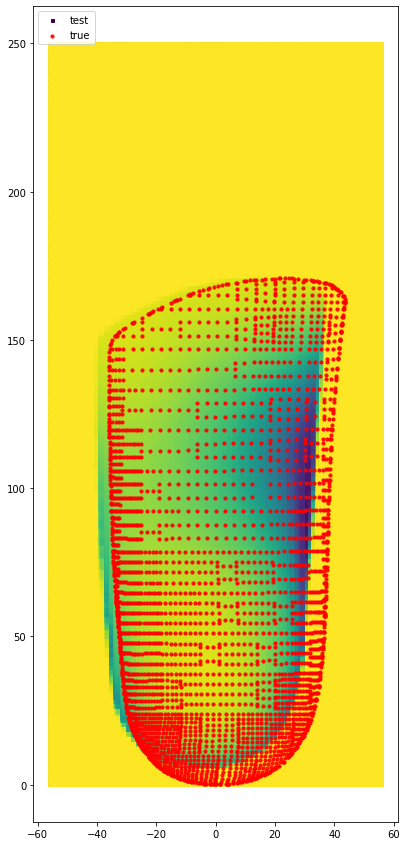

In [14]:
testx = test.vertices[:,0]
testy = test.vertices[:,1]
testz = test.vertices[:,2]

truex = true.vertices[:,0]
truey = true.vertices[:,1]
testx_new = testx - testx.mean()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)

ax1.scatter(testx_new, testy, s=10, c=testz, marker="s", label='test')
ax1.scatter(truex,truey, s=10, c='r', marker="o", label='true', alpha = 0.9)
plt.axis('scaled')
plt.legend(loc='upper left')
plt.show()

In [7]:
mesh = load_mesh('./stl/237136L_mod.stl')
true = load_mesh('./stl/237136L.stl')

In [8]:
def save_mesh(mesh, f_name):
    '''
    f_name: (string) name of the mesh file to save
    '''
    mesh.export(f_name + '.stl')

In [10]:
display_mesh = [mesh]
x_avg = mesh.vertices[:,0].mean()
y_avg = mesh.vertices[:,1].mean()
plate_depth = 1

T_plane = np.linalg.inv(trimesh.geometry.plane_transform(origin=(x_avg,y_avg, plate_depth), normal=[0,0,1]))
grid = trimesh.primitives.Box(extents=[100, 100, 0], transform=T_plane)
grid.visual.face_colors = [0, 255, 0, 0]
display_mesh.append(grid)
# trimesh.Scene(display_mesh).show()
mesh = mesh.slice_plane((x_avg,y_avg, plate_depth), [0,0,1]) 
mesh.show()
save_mesh(mesh, './stl/sliced')

In [11]:
mesh.show()

In [147]:
true.show()

In [158]:
top = load_mesh("./237136L_top.stl")
together = [top, true]
trimesh.Scene(together).show()


In [166]:
plot_meshes(true.vertices, top.vertices, -100, 400)